In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_paths = [
    '../data/geoemotions/goemotions_1.csv',
    '../data/geoemotions/goemotions_2.csv',
    '../data/geoemotions/goemotions_3.csv'
]

dataframes = [pd.read_csv(file) for file in file_paths]
combined_data = pd.concat(dataframes, ignore_index=True)

combined_data.head()
combined_data.shape

(211225, 37)

In [3]:
combined_data.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [4]:
# Mantieni solo le colonne necessarie: 'text' e le colonne delle emozioni
emotion_columns = ['admiration', 'amusement', 'anger', 'annoyance', 'approval',
                   'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
                   'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
                   'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
                   'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise',
                   'neutral']
df = combined_data[['text'] + emotion_columns]

# Crea una nuova colonna 'emotion' con l'emozione predominante per ogni riga
def get_dominant_emotion(row):
    emotions = row[emotion_columns]
    if emotions.sum() == 0:
        return 'neutral'  # Se nessuna emozione è marcata, assegna 'neutral'
    else:
        return emotions.idxmax()

df['emotion'] = df.apply(get_dominant_emotion, axis=1)

# Rimuovi le colonne originali delle emozioni
df = df[['text', 'emotion']]


C:\Users\nicol\AppData\Local\Temp\ipykernel_28256\2475430932.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion'] = df.apply(get_dominant_emotion, axis=1)


In [5]:
df.head()

,text,emotion
0,That game hurt.,sadness
1,>sexuality shouldn’t be a grouping category I...,neutral
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral


In [6]:
import re
import pandas as pd

# Funzione di pulizia del testo
def clean_text(text):
    text = text.lower()  # Converte in minuscolo
    text = re.sub(r'http\S+|www.\S+', '', text)  # Rimuove link
    text = re.sub(r'@\w+', '', text)  # Rimuove menzioni
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Rimuove caratteri speciali e numeri
    text = re.sub(r'\s+', ' ', text).strip()  # Rimuove spazi extra
    return text

# Applica la pulizia
df['cleaned_text'] = df['text'].apply(clean_text)

# Elimina le righe con testo vuoto

df = df.dropna(subset=['cleaned_text'])

# elimina la colonna text

df = df.drop(columns=['text'])

# rinomina la colonna clened_text in text

df.rename(columns={'cleaned_text': 'text'}, inplace=True)


In [7]:
df.head()


,emotion,text
0,sadness,that game hurt
1,neutral,sexuality shouldnt be a grouping category it m...
2,neutral,you do right if you dont care then fuck em
3,love,man i love reddit
4,neutral,name was nowhere near them he was by the falcon


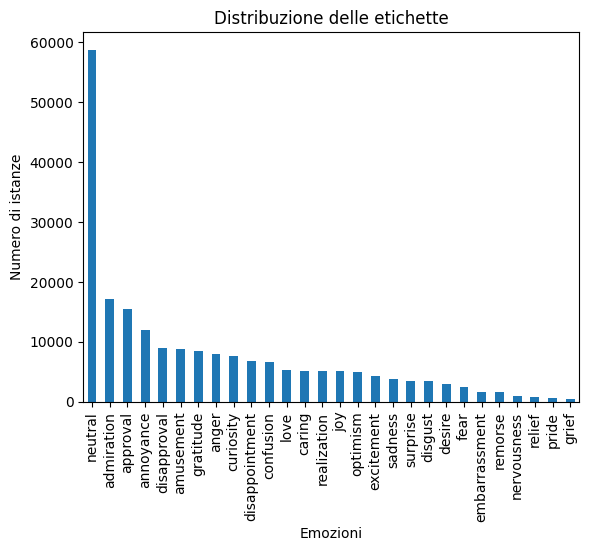

In [8]:
import matplotlib.pyplot as plt

# Conta il numero di istanze per ogni emozione
class_counts = df['emotion'].value_counts()

# Visualizza la distribuzione
class_counts.plot(kind='bar')
plt.title('Distribuzione delle etichette')
plt.xlabel('Emozioni')
plt.ylabel('Numero di istanze')
plt.show()


In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Per sinonimi più completi
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

Distribuzione delle nuove categorie:
category
neutral     81613
positive    79436
negative    50176
Name: count, dtype: int64


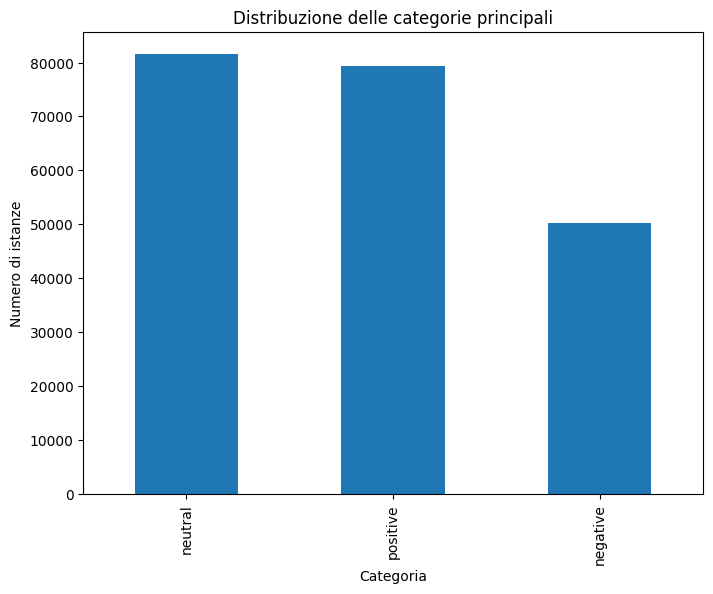

In [10]:
# Definisci la mappa delle emozioni
emotion_map = {
    'admiration': 'positive',
    'amusement': 'positive',
    'approval': 'positive',
    'gratitude': 'positive',
    'love': 'positive',
    'joy': 'positive',
    'optimism': 'positive',
    'caring': 'positive',
    'excitement': 'positive',
    'realization': 'neutral',
    'neutral': 'neutral',
    'confusion': 'neutral',
    'curiosity': 'neutral',
    'remorse': 'negative',
    'anger': 'negative',
    'annoyance': 'negative',
    'disappointment': 'negative',
    'disapproval': 'negative',
    'fear': 'negative',
    'grief': 'negative',
    'sadness': 'negative',
    'disgust': 'negative',
    'nervousness': 'negative',
    'embarrassment': 'negative',
    'surprise': 'neutral',
    'relief': 'positive',
    'desire': 'positive',
    'pride': 'positive'
}

# Applica la mappa al dataset
df['category'] = df['emotion'].map(emotion_map)

# Controlla la nuova distribuzione delle categorie
print("Distribuzione delle nuove categorie:")
print(df['category'].value_counts())

# Visualizza il grafico della nuova distribuzione
import matplotlib.pyplot as plt

df['category'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Distribuzione delle categorie principali")
plt.xlabel("Categoria")
plt.ylabel("Numero di istanze")
plt.show()


In [11]:
df.head()

,emotion,text,category
0,sadness,that game hurt,negative
1,neutral,sexuality shouldnt be a grouping category it m...,neutral
2,neutral,you do right if you dont care then fuck em,neutral
3,love,man i love reddit,positive
4,neutral,name was nowhere near them he was by the falcon,neutral


In [12]:
# elimina la colonna emotion

df = df.drop(columns=['emotion'])

df.head()

,text,category
0,that game hurt,negative
1,sexuality shouldnt be a grouping category it m...,neutral
2,you do right if you dont care then fuck em,neutral
3,man i love reddit,positive
4,name was nowhere near them he was by the falcon,neutral


In [13]:
# Mappa le categorie in indici numerici
unique_labels = sorted(df["category"].unique())
label2id = {label: i for i, label in enumerate(unique_labels)}
id2label = {i: label for label, i in label2id.items()}
print("Label mapping:", label2id)

Label mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [14]:
# Aggiungi la colonna "label" numerica
df["label"] = df["category"].map(label2id)

In [15]:
#!pip install transformers datasets accelerate

import pandas as pd
from datasets import Dataset, ClassLabel
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import numpy as np

# Supponiamo tu abbia già un DataFrame df con le colonne "text" e "category"
# Esempio:
# df = pd.DataFrame({
#    "text": ["that game hurt", "sexuality shouldnt be a grouping category ...", "you do right ...", "man i love reddit", "name was nowhere near them"],
#    "category": ["negative", "neutral", "neutral", "positive", "neutral"]
# })


# Converti il DataFrame in un dataset HuggingFace
dataset = Dataset.from_pandas(df[["text", "label"]])  # Prendiamo solo le colonne necessarie

# Separa in train/validation/test set
# Supponiamo di fare un semplice split train/val 80/20 (adatta come preferisci)
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset["train"]
eval_dataset = dataset["test"]

# Carica tokenizer e modello pre-addestrato
model_name = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Prepara la funzione di tokenizzazione
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

# Impostiamo il formato per PyTorch
train_dataset = train_dataset.remove_columns(["text"]).with_format("torch")
eval_dataset = eval_dataset.remove_columns(["text"]).with_format("torch")

# Carica il modello con il numero di etichette corretto
num_labels = len(unique_labels)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, id2label=id2label, label2id=label2id)

# Definisci i parametri di addestramento
training_args = TrainingArguments(
    output_dir="./finetuned-model",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_steps=100,
    push_to_hub=False
)

# Funzione per il calcolo delle metriche
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = np.mean(predictions == labels)
    return {"accuracy": accuracy}

# Crea il Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

c:\Users\nicol\anaconda3\envs\sentiment_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Map: 100%|██████████| 42245/42245 [00:02<00:00, 20181.83 examples/s]
c:\Users\nicol\anaconda3\envs\sentiment_env\lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\nicol\AppData\Local\Temp\ipykernel_28256\737425298.py:67: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [16]:
# Avvia il fine-tuning
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: nicologiuse2003 (nicologiuse2003-ironhack). Use `wandb login --relogin` to force relogin


  0%|          | 100/31686 [00:28<2:27:23,  3.57it/s]

{'loss': 1.0854, 'grad_norm': 10.088520050048828, 'learning_rate': 1.9936880641292687e-05, 'epoch': 0.01}


  1%|          | 200/31686 [00:56<2:27:40,  3.55it/s]

{'loss': 0.8697, 'grad_norm': 10.211801528930664, 'learning_rate': 1.987376128258537e-05, 'epoch': 0.02}


  1%|          | 300/31686 [01:24<2:29:12,  3.51it/s]

{'loss': 0.8877, 'grad_norm': 13.59319019317627, 'learning_rate': 1.9810641923878055e-05, 'epoch': 0.03}


  1%|▏         | 400/31686 [01:52<2:27:02,  3.55it/s]

{'loss': 0.8488, 'grad_norm': 11.996105194091797, 'learning_rate': 1.974752256517074e-05, 'epoch': 0.04}


  2%|▏         | 500/31686 [02:20<2:25:48,  3.56it/s]

{'loss': 0.8479, 'grad_norm': 8.286151885986328, 'learning_rate': 1.9684403206463426e-05, 'epoch': 0.05}


  2%|▏         | 600/31686 [02:48<2:24:45,  3.58it/s]

{'loss': 0.8425, 'grad_norm': 6.142667770385742, 'learning_rate': 1.9621283847756108e-05, 'epoch': 0.06}


  2%|▏         | 700/31686 [03:16<2:22:15,  3.63it/s]

{'loss': 0.8073, 'grad_norm': 9.056694984436035, 'learning_rate': 1.955816448904879e-05, 'epoch': 0.07}


  3%|▎         | 800/31686 [03:43<2:21:27,  3.64it/s]

{'loss': 0.8376, 'grad_norm': 8.489118576049805, 'learning_rate': 1.9495045130341476e-05, 'epoch': 0.08}


  3%|▎         | 900/31686 [04:11<2:20:34,  3.65it/s]

{'loss': 0.8258, 'grad_norm': 7.395462989807129, 'learning_rate': 1.943192577163416e-05, 'epoch': 0.09}


  3%|▎         | 1000/31686 [04:38<2:20:12,  3.65it/s]

{'loss': 0.8088, 'grad_norm': 12.114877700805664, 'learning_rate': 1.9368806412926847e-05, 'epoch': 0.09}


  3%|▎         | 1100/31686 [05:06<2:19:13,  3.66it/s]

{'loss': 0.7823, 'grad_norm': 5.062403678894043, 'learning_rate': 1.930568705421953e-05, 'epoch': 0.1}


  4%|▍         | 1200/31686 [05:33<2:22:20,  3.57it/s]

{'loss': 0.8298, 'grad_norm': 8.065629005432129, 'learning_rate': 1.9242567695512215e-05, 'epoch': 0.11}


  4%|▍         | 1300/31686 [06:01<2:20:30,  3.60it/s]

{'loss': 0.7988, 'grad_norm': 8.34982681274414, 'learning_rate': 1.91794483368049e-05, 'epoch': 0.12}


  4%|▍         | 1400/31686 [06:29<2:20:01,  3.60it/s]

{'loss': 0.8173, 'grad_norm': 6.755024433135986, 'learning_rate': 1.9116328978097586e-05, 'epoch': 0.13}


  5%|▍         | 1500/31686 [06:56<2:19:10,  3.62it/s]

{'loss': 0.8056, 'grad_norm': 7.868471145629883, 'learning_rate': 1.9053209619390268e-05, 'epoch': 0.14}


  5%|▌         | 1600/31686 [07:24<2:18:43,  3.61it/s]

{'loss': 0.8019, 'grad_norm': 5.553494453430176, 'learning_rate': 1.8990090260682954e-05, 'epoch': 0.15}


  5%|▌         | 1700/31686 [07:52<2:20:06,  3.57it/s]

{'loss': 0.8044, 'grad_norm': 5.9174299240112305, 'learning_rate': 1.8926970901975636e-05, 'epoch': 0.16}


  6%|▌         | 1800/31686 [08:19<2:16:53,  3.64it/s]

{'loss': 0.8051, 'grad_norm': 8.94785213470459, 'learning_rate': 1.886385154326832e-05, 'epoch': 0.17}


  6%|▌         | 1900/31686 [08:47<2:16:28,  3.64it/s]

{'loss': 0.7883, 'grad_norm': 9.164159774780273, 'learning_rate': 1.8800732184561007e-05, 'epoch': 0.18}


  6%|▋         | 2000/31686 [09:14<2:16:42,  3.62it/s]

{'loss': 0.7925, 'grad_norm': 8.578289985656738, 'learning_rate': 1.873761282585369e-05, 'epoch': 0.19}


  7%|▋         | 2100/31686 [09:42<2:16:16,  3.62it/s]

{'loss': 0.7807, 'grad_norm': 9.418660163879395, 'learning_rate': 1.8674493467146375e-05, 'epoch': 0.2}


  7%|▋         | 2200/31686 [10:09<2:14:47,  3.65it/s]

{'loss': 0.7689, 'grad_norm': 7.06502103805542, 'learning_rate': 1.861137410843906e-05, 'epoch': 0.21}


  7%|▋         | 2300/31686 [10:37<2:14:47,  3.63it/s]

{'loss': 0.7914, 'grad_norm': 11.495357513427734, 'learning_rate': 1.8548254749731746e-05, 'epoch': 0.22}


  8%|▊         | 2400/31686 [11:05<2:16:36,  3.57it/s]

{'loss': 0.8071, 'grad_norm': 8.693758010864258, 'learning_rate': 1.8485135391024428e-05, 'epoch': 0.23}


  8%|▊         | 2500/31686 [11:33<2:17:44,  3.53it/s]

{'loss': 0.8092, 'grad_norm': 4.156042575836182, 'learning_rate': 1.8422016032317114e-05, 'epoch': 0.24}


  8%|▊         | 2600/31686 [12:01<2:13:45,  3.62it/s]

{'loss': 0.7995, 'grad_norm': 7.991362571716309, 'learning_rate': 1.83588966736098e-05, 'epoch': 0.25}


  9%|▊         | 2700/31686 [12:28<2:12:56,  3.63it/s]

{'loss': 0.8042, 'grad_norm': 7.415524482727051, 'learning_rate': 1.8295777314902485e-05, 'epoch': 0.26}


  9%|▉         | 2800/31686 [12:56<2:12:28,  3.63it/s]

{'loss': 0.7842, 'grad_norm': 5.804526329040527, 'learning_rate': 1.8232657956195167e-05, 'epoch': 0.27}


  9%|▉         | 2900/31686 [13:24<2:12:37,  3.62it/s]

{'loss': 0.7766, 'grad_norm': 7.755295276641846, 'learning_rate': 1.816953859748785e-05, 'epoch': 0.27}


  9%|▉         | 3000/31686 [13:51<2:12:21,  3.61it/s]

{'loss': 0.8012, 'grad_norm': 5.533071994781494, 'learning_rate': 1.8106419238780535e-05, 'epoch': 0.28}


 10%|▉         | 3100/31686 [14:19<2:10:33,  3.65it/s]

{'loss': 0.8081, 'grad_norm': 8.650317192077637, 'learning_rate': 1.804329988007322e-05, 'epoch': 0.29}


 10%|█         | 3200/31686 [14:46<2:13:08,  3.57it/s]

{'loss': 0.7544, 'grad_norm': 8.396547317504883, 'learning_rate': 1.7980180521365906e-05, 'epoch': 0.3}


 10%|█         | 3300/31686 [15:14<2:09:25,  3.66it/s]

{'loss': 0.7781, 'grad_norm': 5.627017974853516, 'learning_rate': 1.7917061162658588e-05, 'epoch': 0.31}


 11%|█         | 3400/31686 [15:42<2:09:59,  3.63it/s]

{'loss': 0.8229, 'grad_norm': 8.923855781555176, 'learning_rate': 1.7853941803951273e-05, 'epoch': 0.32}


 11%|█         | 3500/31686 [16:09<2:08:04,  3.67it/s]

{'loss': 0.7754, 'grad_norm': 6.67642068862915, 'learning_rate': 1.779082244524396e-05, 'epoch': 0.33}


 11%|█▏        | 3600/31686 [16:37<2:08:34,  3.64it/s]

{'loss': 0.77, 'grad_norm': 17.676868438720703, 'learning_rate': 1.772770308653664e-05, 'epoch': 0.34}


 12%|█▏        | 3700/31686 [17:04<2:08:15,  3.64it/s]

{'loss': 0.7778, 'grad_norm': 6.333429336547852, 'learning_rate': 1.7664583727829327e-05, 'epoch': 0.35}


 12%|█▏        | 3800/31686 [17:32<2:10:15,  3.57it/s]

{'loss': 0.75, 'grad_norm': 4.909641742706299, 'learning_rate': 1.7601464369122012e-05, 'epoch': 0.36}


 12%|█▏        | 3900/31686 [17:59<2:07:26,  3.63it/s]

{'loss': 0.8051, 'grad_norm': 5.65777587890625, 'learning_rate': 1.7538345010414694e-05, 'epoch': 0.37}


 13%|█▎        | 4000/31686 [18:27<2:06:47,  3.64it/s]

{'loss': 0.7683, 'grad_norm': 5.934462070465088, 'learning_rate': 1.747522565170738e-05, 'epoch': 0.38}


 13%|█▎        | 4100/31686 [18:54<2:06:38,  3.63it/s]

{'loss': 0.7536, 'grad_norm': 5.826928615570068, 'learning_rate': 1.7412106293000066e-05, 'epoch': 0.39}


 13%|█▎        | 4200/31686 [19:22<2:04:41,  3.67it/s]

{'loss': 0.78, 'grad_norm': 6.471759796142578, 'learning_rate': 1.7348986934292748e-05, 'epoch': 0.4}


 14%|█▎        | 4300/31686 [19:49<2:06:39,  3.60it/s]

{'loss': 0.8016, 'grad_norm': 6.499363899230957, 'learning_rate': 1.7285867575585433e-05, 'epoch': 0.41}


 14%|█▍        | 4400/31686 [20:17<2:04:52,  3.64it/s]

{'loss': 0.7994, 'grad_norm': 7.09765100479126, 'learning_rate': 1.722274821687812e-05, 'epoch': 0.42}


 14%|█▍        | 4500/31686 [20:44<2:04:21,  3.64it/s]

{'loss': 0.7731, 'grad_norm': 6.786588668823242, 'learning_rate': 1.71596288581708e-05, 'epoch': 0.43}


 15%|█▍        | 4600/31686 [21:12<2:04:15,  3.63it/s]

{'loss': 0.7989, 'grad_norm': 6.697587013244629, 'learning_rate': 1.7096509499463487e-05, 'epoch': 0.44}


 15%|█▍        | 4700/31686 [21:39<2:02:58,  3.66it/s]

{'loss': 0.8086, 'grad_norm': 7.266810894012451, 'learning_rate': 1.7033390140756172e-05, 'epoch': 0.44}


 15%|█▌        | 4800/31686 [22:07<2:02:47,  3.65it/s]

{'loss': 0.7954, 'grad_norm': 6.228952407836914, 'learning_rate': 1.6970270782048858e-05, 'epoch': 0.45}


 15%|█▌        | 4900/31686 [22:34<2:02:34,  3.64it/s]

{'loss': 0.7446, 'grad_norm': 8.009441375732422, 'learning_rate': 1.690715142334154e-05, 'epoch': 0.46}


 16%|█▌        | 5000/31686 [23:02<2:02:18,  3.64it/s]

{'loss': 0.7825, 'grad_norm': 8.091269493103027, 'learning_rate': 1.6844032064634222e-05, 'epoch': 0.47}


 16%|█▌        | 5100/31686 [23:30<2:01:43,  3.64it/s]

{'loss': 0.7633, 'grad_norm': 9.029672622680664, 'learning_rate': 1.6780912705926908e-05, 'epoch': 0.48}


 16%|█▋        | 5200/31686 [23:57<2:01:21,  3.64it/s]

{'loss': 0.7622, 'grad_norm': 4.371272087097168, 'learning_rate': 1.6717793347219593e-05, 'epoch': 0.49}


 17%|█▋        | 5300/31686 [24:25<2:00:36,  3.65it/s]

{'loss': 0.7997, 'grad_norm': 7.363473892211914, 'learning_rate': 1.665467398851228e-05, 'epoch': 0.5}


 17%|█▋        | 5400/31686 [24:52<2:00:43,  3.63it/s]

{'loss': 0.7764, 'grad_norm': 6.907924652099609, 'learning_rate': 1.659155462980496e-05, 'epoch': 0.51}


 17%|█▋        | 5500/31686 [25:20<1:59:57,  3.64it/s]

{'loss': 0.7561, 'grad_norm': 5.809798717498779, 'learning_rate': 1.6528435271097647e-05, 'epoch': 0.52}


 18%|█▊        | 5600/31686 [25:47<1:58:56,  3.66it/s]

{'loss': 0.7945, 'grad_norm': 6.33332633972168, 'learning_rate': 1.6465315912390332e-05, 'epoch': 0.53}


 18%|█▊        | 5700/31686 [26:15<1:59:06,  3.64it/s]

{'loss': 0.7531, 'grad_norm': 6.5693769454956055, 'learning_rate': 1.6402196553683018e-05, 'epoch': 0.54}


 18%|█▊        | 5800/31686 [26:42<1:58:06,  3.65it/s]

{'loss': 0.8012, 'grad_norm': 7.375117778778076, 'learning_rate': 1.63390771949757e-05, 'epoch': 0.55}


 19%|█▊        | 5900/31686 [27:10<1:57:32,  3.66it/s]

{'loss': 0.7716, 'grad_norm': 4.420727729797363, 'learning_rate': 1.6275957836268385e-05, 'epoch': 0.56}


 19%|█▉        | 6000/31686 [27:37<1:58:03,  3.63it/s]

{'loss': 0.7522, 'grad_norm': 7.828900337219238, 'learning_rate': 1.621283847756107e-05, 'epoch': 0.57}


 19%|█▉        | 6100/31686 [28:05<1:56:59,  3.65it/s]

{'loss': 0.7704, 'grad_norm': 4.820910930633545, 'learning_rate': 1.6149719118853753e-05, 'epoch': 0.58}


 20%|█▉        | 6200/31686 [28:32<1:56:42,  3.64it/s]

{'loss': 0.7539, 'grad_norm': 5.807470798492432, 'learning_rate': 1.608659976014644e-05, 'epoch': 0.59}


 20%|█▉        | 6300/31686 [29:00<1:56:01,  3.65it/s]

{'loss': 0.772, 'grad_norm': 7.11558198928833, 'learning_rate': 1.602348040143912e-05, 'epoch': 0.6}


 20%|██        | 6400/31686 [29:27<1:56:00,  3.63it/s]

{'loss': 0.735, 'grad_norm': 4.6705498695373535, 'learning_rate': 1.5960361042731806e-05, 'epoch': 0.61}


 21%|██        | 6500/31686 [29:55<1:55:20,  3.64it/s]

{'loss': 0.78, 'grad_norm': 6.158481597900391, 'learning_rate': 1.5897241684024492e-05, 'epoch': 0.62}


 21%|██        | 6600/31686 [30:23<1:54:37,  3.65it/s]

{'loss': 0.7612, 'grad_norm': 5.597762107849121, 'learning_rate': 1.5834122325317178e-05, 'epoch': 0.62}


 21%|██        | 6700/31686 [30:50<1:53:51,  3.66it/s]

{'loss': 0.7456, 'grad_norm': 6.700362205505371, 'learning_rate': 1.577100296660986e-05, 'epoch': 0.63}


 21%|██▏       | 6800/31686 [31:17<1:52:59,  3.67it/s]

{'loss': 0.773, 'grad_norm': 4.587167263031006, 'learning_rate': 1.5707883607902545e-05, 'epoch': 0.64}


 22%|██▏       | 6900/31686 [31:45<1:53:48,  3.63it/s]

{'loss': 0.7663, 'grad_norm': 6.290201663970947, 'learning_rate': 1.564476424919523e-05, 'epoch': 0.65}


 22%|██▏       | 7000/31686 [32:12<1:53:15,  3.63it/s]

{'loss': 0.7406, 'grad_norm': 7.042006015777588, 'learning_rate': 1.5581644890487916e-05, 'epoch': 0.66}


 22%|██▏       | 7100/31686 [32:40<1:52:29,  3.64it/s]

{'loss': 0.7568, 'grad_norm': 6.331860065460205, 'learning_rate': 1.55185255317806e-05, 'epoch': 0.67}


 23%|██▎       | 7200/31686 [33:08<1:52:23,  3.63it/s]

{'loss': 0.7516, 'grad_norm': 7.617773532867432, 'learning_rate': 1.545540617307328e-05, 'epoch': 0.68}


 23%|██▎       | 7300/31686 [33:35<1:51:17,  3.65it/s]

{'loss': 0.7641, 'grad_norm': 4.928391933441162, 'learning_rate': 1.5392286814365966e-05, 'epoch': 0.69}


 23%|██▎       | 7400/31686 [34:03<1:51:19,  3.64it/s]

{'loss': 0.7677, 'grad_norm': 7.960669040679932, 'learning_rate': 1.5329167455658652e-05, 'epoch': 0.7}


 24%|██▎       | 7500/31686 [34:30<1:50:51,  3.64it/s]

{'loss': 0.7886, 'grad_norm': 6.8118696212768555, 'learning_rate': 1.5266048096951337e-05, 'epoch': 0.71}


 24%|██▍       | 7600/31686 [34:58<1:50:04,  3.65it/s]

{'loss': 0.7753, 'grad_norm': 6.655844688415527, 'learning_rate': 1.5202928738244021e-05, 'epoch': 0.72}


 24%|██▍       | 7700/31686 [35:25<1:49:57,  3.64it/s]

{'loss': 0.7741, 'grad_norm': 4.183379173278809, 'learning_rate': 1.5139809379536705e-05, 'epoch': 0.73}


 25%|██▍       | 7800/31686 [35:53<1:49:09,  3.65it/s]

{'loss': 0.7589, 'grad_norm': 6.268215179443359, 'learning_rate': 1.5076690020829389e-05, 'epoch': 0.74}


 25%|██▍       | 7900/31686 [36:20<1:48:37,  3.65it/s]

{'loss': 0.7883, 'grad_norm': 9.089400291442871, 'learning_rate': 1.5013570662122075e-05, 'epoch': 0.75}


 25%|██▌       | 8000/31686 [36:48<1:48:24,  3.64it/s]

{'loss': 0.7824, 'grad_norm': 5.799696922302246, 'learning_rate': 1.4950451303414758e-05, 'epoch': 0.76}


 26%|██▌       | 8100/31686 [37:15<1:48:09,  3.63it/s]

{'loss': 0.7619, 'grad_norm': 7.452650547027588, 'learning_rate': 1.4887331944707444e-05, 'epoch': 0.77}


 26%|██▌       | 8200/31686 [37:43<1:47:41,  3.63it/s]

{'loss': 0.7478, 'grad_norm': 3.5819928646087646, 'learning_rate': 1.4824212586000128e-05, 'epoch': 0.78}


 26%|██▌       | 8300/31686 [38:11<1:47:14,  3.63it/s]

{'loss': 0.7992, 'grad_norm': 5.279333114624023, 'learning_rate': 1.476109322729281e-05, 'epoch': 0.79}


 27%|██▋       | 8400/31686 [38:38<1:46:19,  3.65it/s]

{'loss': 0.7635, 'grad_norm': 8.684061050415039, 'learning_rate': 1.4697973868585496e-05, 'epoch': 0.8}


 27%|██▋       | 8500/31686 [39:05<1:45:50,  3.65it/s]

{'loss': 0.7712, 'grad_norm': 5.067358493804932, 'learning_rate': 1.463485450987818e-05, 'epoch': 0.8}


 27%|██▋       | 8600/31686 [39:33<1:46:00,  3.63it/s]

{'loss': 0.7754, 'grad_norm': 8.900163650512695, 'learning_rate': 1.4571735151170865e-05, 'epoch': 0.81}


 27%|██▋       | 8700/31686 [40:01<1:45:23,  3.63it/s]

{'loss': 0.7634, 'grad_norm': 5.411568641662598, 'learning_rate': 1.4508615792463549e-05, 'epoch': 0.82}


 28%|██▊       | 8800/31686 [40:28<1:45:08,  3.63it/s]

{'loss': 0.7463, 'grad_norm': 4.4689202308654785, 'learning_rate': 1.4445496433756235e-05, 'epoch': 0.83}


 28%|██▊       | 8900/31686 [40:56<1:44:21,  3.64it/s]

{'loss': 0.772, 'grad_norm': 6.719367504119873, 'learning_rate': 1.4382377075048918e-05, 'epoch': 0.84}


 28%|██▊       | 9000/31686 [41:23<1:43:40,  3.65it/s]

{'loss': 0.7923, 'grad_norm': 5.195294380187988, 'learning_rate': 1.4319257716341604e-05, 'epoch': 0.85}


 29%|██▊       | 9100/31686 [41:51<1:43:22,  3.64it/s]

{'loss': 0.7733, 'grad_norm': 3.2082297801971436, 'learning_rate': 1.4256138357634288e-05, 'epoch': 0.86}


 29%|██▉       | 9200/31686 [42:18<1:43:19,  3.63it/s]

{'loss': 0.7828, 'grad_norm': 4.952198028564453, 'learning_rate': 1.4193018998926973e-05, 'epoch': 0.87}


 29%|██▉       | 9300/31686 [42:46<1:42:27,  3.64it/s]

{'loss': 0.7402, 'grad_norm': 4.244543552398682, 'learning_rate': 1.4129899640219657e-05, 'epoch': 0.88}


 30%|██▉       | 9400/31686 [43:14<1:43:54,  3.57it/s]

{'loss': 0.7655, 'grad_norm': 6.021603584289551, 'learning_rate': 1.406678028151234e-05, 'epoch': 0.89}


 30%|██▉       | 9500/31686 [43:42<1:40:56,  3.66it/s]

{'loss': 0.7614, 'grad_norm': 8.805896759033203, 'learning_rate': 1.4003660922805025e-05, 'epoch': 0.9}


 30%|███       | 9600/31686 [44:09<1:45:08,  3.50it/s]

{'loss': 0.7697, 'grad_norm': 7.242636680603027, 'learning_rate': 1.3940541564097709e-05, 'epoch': 0.91}


 31%|███       | 9700/31686 [44:37<1:40:41,  3.64it/s]

{'loss': 0.7598, 'grad_norm': 6.635139465332031, 'learning_rate': 1.3877422205390394e-05, 'epoch': 0.92}


 31%|███       | 9800/31686 [45:04<1:39:59,  3.65it/s]

{'loss': 0.7517, 'grad_norm': 7.685222625732422, 'learning_rate': 1.3814302846683078e-05, 'epoch': 0.93}


 31%|███       | 9900/31686 [45:32<1:39:55,  3.63it/s]

{'loss': 0.7365, 'grad_norm': 7.0534348487854, 'learning_rate': 1.3751183487975764e-05, 'epoch': 0.94}


 32%|███▏      | 10000/31686 [46:00<1:39:05,  3.65it/s]

{'loss': 0.7488, 'grad_norm': 7.881643772125244, 'learning_rate': 1.3688064129268448e-05, 'epoch': 0.95}


 32%|███▏      | 10100/31686 [46:27<1:38:28,  3.65it/s]

{'loss': 0.7643, 'grad_norm': 6.5965352058410645, 'learning_rate': 1.3624944770561133e-05, 'epoch': 0.96}


 32%|███▏      | 10200/31686 [46:55<1:38:22,  3.64it/s]

{'loss': 0.7411, 'grad_norm': 5.250183582305908, 'learning_rate': 1.3561825411853817e-05, 'epoch': 0.97}


 33%|███▎      | 10300/31686 [47:22<1:37:56,  3.64it/s]

{'loss': 0.7575, 'grad_norm': 7.0626091957092285, 'learning_rate': 1.3498706053146503e-05, 'epoch': 0.98}


 33%|███▎      | 10400/31686 [47:50<1:37:43,  3.63it/s]

{'loss': 0.7439, 'grad_norm': 6.0654401779174805, 'learning_rate': 1.3435586694439187e-05, 'epoch': 0.98}


 33%|███▎      | 10500/31686 [48:17<1:37:16,  3.63it/s]

{'loss': 0.7476, 'grad_norm': 6.389530658721924, 'learning_rate': 1.3372467335731869e-05, 'epoch': 0.99}


                                                       
 33%|███▎      | 10562/31686 [52:42<1:21:04,  4.34it/s]

{'eval_loss': 0.7598353028297424, 'eval_accuracy': 0.6644336607882589, 'eval_runtime': 247.3416, 'eval_samples_per_second': 170.796, 'eval_steps_per_second': 5.341, 'epoch': 1.0}


 33%|███▎      | 10600/31686 [52:57<1:40:58,  3.48it/s]  

{'loss': 0.7231, 'grad_norm': 7.24107551574707, 'learning_rate': 1.3309347977024554e-05, 'epoch': 1.0}


 34%|███▍      | 10700/31686 [53:25<1:36:19,  3.63it/s]

{'loss': 0.7227, 'grad_norm': 6.207789421081543, 'learning_rate': 1.3246228618317238e-05, 'epoch': 1.01}


 34%|███▍      | 10800/31686 [53:53<1:36:09,  3.62it/s]

{'loss': 0.6951, 'grad_norm': 7.846357822418213, 'learning_rate': 1.3183109259609924e-05, 'epoch': 1.02}


 34%|███▍      | 10900/31686 [54:20<1:35:26,  3.63it/s]

{'loss': 0.7067, 'grad_norm': 6.758009433746338, 'learning_rate': 1.3119989900902608e-05, 'epoch': 1.03}


 35%|███▍      | 11000/31686 [54:49<1:37:46,  3.53it/s]

{'loss': 0.7506, 'grad_norm': 5.5906171798706055, 'learning_rate': 1.3056870542195293e-05, 'epoch': 1.04}


 35%|███▌      | 11100/31686 [55:17<1:34:31,  3.63it/s]

{'loss': 0.7396, 'grad_norm': 7.70327615737915, 'learning_rate': 1.2993751183487977e-05, 'epoch': 1.05}


 35%|███▌      | 11200/31686 [55:44<1:36:24,  3.54it/s]

{'loss': 0.7113, 'grad_norm': 6.627842903137207, 'learning_rate': 1.2930631824780661e-05, 'epoch': 1.06}


 36%|███▌      | 11300/31686 [56:12<1:33:25,  3.64it/s]

{'loss': 0.7045, 'grad_norm': 5.900317668914795, 'learning_rate': 1.2867512466073346e-05, 'epoch': 1.07}


 36%|███▌      | 11400/31686 [56:40<1:32:42,  3.65it/s]

{'loss': 0.7102, 'grad_norm': 8.143777847290039, 'learning_rate': 1.280439310736603e-05, 'epoch': 1.08}


 36%|███▋      | 11500/31686 [57:07<1:32:15,  3.65it/s]

{'loss': 0.7283, 'grad_norm': 10.578924179077148, 'learning_rate': 1.2741273748658716e-05, 'epoch': 1.09}


 37%|███▋      | 11600/31686 [57:35<1:32:12,  3.63it/s]

{'loss': 0.7152, 'grad_norm': 5.836254119873047, 'learning_rate': 1.2678154389951398e-05, 'epoch': 1.1}


 37%|███▋      | 11700/31686 [58:02<1:32:12,  3.61it/s]

{'loss': 0.7223, 'grad_norm': 6.231611728668213, 'learning_rate': 1.2615035031244084e-05, 'epoch': 1.11}


 37%|███▋      | 11800/31686 [58:29<1:30:22,  3.67it/s]

{'loss': 0.7249, 'grad_norm': 7.3243021965026855, 'learning_rate': 1.2551915672536767e-05, 'epoch': 1.12}


 38%|███▊      | 11900/31686 [58:57<1:30:07,  3.66it/s]

{'loss': 0.7171, 'grad_norm': 6.6443634033203125, 'learning_rate': 1.2488796313829451e-05, 'epoch': 1.13}


 38%|███▊      | 12000/31686 [59:24<1:29:47,  3.65it/s]

{'loss': 0.7355, 'grad_norm': 7.451227188110352, 'learning_rate': 1.2425676955122137e-05, 'epoch': 1.14}


 38%|███▊      | 12100/31686 [59:52<1:30:17,  3.62it/s]

{'loss': 0.7026, 'grad_norm': 5.718066215515137, 'learning_rate': 1.236255759641482e-05, 'epoch': 1.15}


 39%|███▊      | 12200/31686 [1:00:20<1:29:30,  3.63it/s]

{'loss': 0.7365, 'grad_norm': 8.129007339477539, 'learning_rate': 1.2299438237707506e-05, 'epoch': 1.16}


 39%|███▉      | 12300/31686 [1:00:47<1:28:12,  3.66it/s]

{'loss': 0.7479, 'grad_norm': 7.1451945304870605, 'learning_rate': 1.223631887900019e-05, 'epoch': 1.16}


 39%|███▉      | 12400/31686 [1:01:15<1:28:28,  3.63it/s]

{'loss': 0.7284, 'grad_norm': 5.35414981842041, 'learning_rate': 1.2173199520292876e-05, 'epoch': 1.17}


 39%|███▉      | 12500/31686 [1:01:42<1:27:07,  3.67it/s]

{'loss': 0.7263, 'grad_norm': 6.566641330718994, 'learning_rate': 1.211008016158556e-05, 'epoch': 1.18}


 40%|███▉      | 12600/31686 [1:02:09<1:27:36,  3.63it/s]

{'loss': 0.7203, 'grad_norm': 5.508164882659912, 'learning_rate': 1.2046960802878245e-05, 'epoch': 1.19}


 40%|████      | 12700/31686 [1:02:37<1:26:40,  3.65it/s]

{'loss': 0.6749, 'grad_norm': 5.18920373916626, 'learning_rate': 1.1983841444170927e-05, 'epoch': 1.2}


 40%|████      | 12800/31686 [1:03:04<1:26:42,  3.63it/s]

{'loss': 0.7005, 'grad_norm': 6.221944332122803, 'learning_rate': 1.1920722085463611e-05, 'epoch': 1.21}


 41%|████      | 12900/31686 [1:03:32<1:25:35,  3.66it/s]

{'loss': 0.7283, 'grad_norm': 7.291299819946289, 'learning_rate': 1.1857602726756297e-05, 'epoch': 1.22}


 41%|████      | 13000/31686 [1:03:59<1:25:50,  3.63it/s]

{'loss': 0.7416, 'grad_norm': 6.204601764678955, 'learning_rate': 1.179448336804898e-05, 'epoch': 1.23}


 41%|████▏     | 13100/31686 [1:04:27<1:24:58,  3.65it/s]

{'loss': 0.7298, 'grad_norm': 5.239338397979736, 'learning_rate': 1.1731364009341666e-05, 'epoch': 1.24}


 42%|████▏     | 13200/31686 [1:04:54<1:24:27,  3.65it/s]

{'loss': 0.7164, 'grad_norm': 5.613219261169434, 'learning_rate': 1.166824465063435e-05, 'epoch': 1.25}


 42%|████▏     | 13300/31686 [1:05:22<1:24:50,  3.61it/s]

{'loss': 0.75, 'grad_norm': 7.715310573577881, 'learning_rate': 1.1605125291927036e-05, 'epoch': 1.26}


 42%|████▏     | 13400/31686 [1:05:49<1:23:48,  3.64it/s]

{'loss': 0.7155, 'grad_norm': 6.8846964836120605, 'learning_rate': 1.154200593321972e-05, 'epoch': 1.27}


 43%|████▎     | 13500/31686 [1:06:17<1:23:10,  3.64it/s]

{'loss': 0.7309, 'grad_norm': 8.38552188873291, 'learning_rate': 1.1478886574512405e-05, 'epoch': 1.28}


 43%|████▎     | 13600/31686 [1:06:44<1:22:38,  3.65it/s]

{'loss': 0.7372, 'grad_norm': 7.073720932006836, 'learning_rate': 1.1415767215805089e-05, 'epoch': 1.29}


 43%|████▎     | 13700/31686 [1:07:12<1:22:25,  3.64it/s]

{'loss': 0.7399, 'grad_norm': 5.845370769500732, 'learning_rate': 1.1352647857097775e-05, 'epoch': 1.3}


 44%|████▎     | 13800/31686 [1:07:39<1:21:49,  3.64it/s]

{'loss': 0.7086, 'grad_norm': 7.860400199890137, 'learning_rate': 1.1289528498390457e-05, 'epoch': 1.31}


 44%|████▍     | 13900/31686 [1:08:07<1:21:21,  3.64it/s]

{'loss': 0.6948, 'grad_norm': 4.886869430541992, 'learning_rate': 1.122640913968314e-05, 'epoch': 1.32}


 44%|████▍     | 14000/31686 [1:08:34<1:20:35,  3.66it/s]

{'loss': 0.7091, 'grad_norm': 6.418835163116455, 'learning_rate': 1.1163289780975826e-05, 'epoch': 1.33}


 44%|████▍     | 14100/31686 [1:09:02<1:20:05,  3.66it/s]

{'loss': 0.7356, 'grad_norm': 6.6362996101379395, 'learning_rate': 1.110017042226851e-05, 'epoch': 1.33}


 45%|████▍     | 14200/31686 [1:09:29<1:20:01,  3.64it/s]

{'loss': 0.7196, 'grad_norm': 5.740250110626221, 'learning_rate': 1.1037051063561196e-05, 'epoch': 1.34}


 45%|████▌     | 14300/31686 [1:09:57<1:19:23,  3.65it/s]

{'loss': 0.7118, 'grad_norm': 7.012470722198486, 'learning_rate': 1.097393170485388e-05, 'epoch': 1.35}


 45%|████▌     | 14400/31686 [1:10:24<1:19:02,  3.64it/s]

{'loss': 0.7197, 'grad_norm': 4.094256401062012, 'learning_rate': 1.0910812346146565e-05, 'epoch': 1.36}


 46%|████▌     | 14500/31686 [1:10:52<1:19:07,  3.62it/s]

{'loss': 0.7509, 'grad_norm': 6.367161750793457, 'learning_rate': 1.0847692987439249e-05, 'epoch': 1.37}


 46%|████▌     | 14600/31686 [1:11:19<1:18:53,  3.61it/s]

{'loss': 0.7263, 'grad_norm': 6.287383079528809, 'learning_rate': 1.0784573628731934e-05, 'epoch': 1.38}


 46%|████▋     | 14700/31686 [1:11:47<1:17:48,  3.64it/s]

{'loss': 0.7311, 'grad_norm': 7.362473964691162, 'learning_rate': 1.0721454270024618e-05, 'epoch': 1.39}


 47%|████▋     | 14800/31686 [1:12:14<1:17:18,  3.64it/s]

{'loss': 0.7091, 'grad_norm': 5.356075286865234, 'learning_rate': 1.0658334911317302e-05, 'epoch': 1.4}


 47%|████▋     | 14900/31686 [1:12:42<1:16:19,  3.67it/s]

{'loss': 0.7178, 'grad_norm': 6.215479850769043, 'learning_rate': 1.0595215552609986e-05, 'epoch': 1.41}


 47%|████▋     | 15000/31686 [1:13:09<1:16:20,  3.64it/s]

{'loss': 0.7607, 'grad_norm': 5.338979244232178, 'learning_rate': 1.053209619390267e-05, 'epoch': 1.42}


 48%|████▊     | 15100/31686 [1:13:37<1:15:52,  3.64it/s]

{'loss': 0.7169, 'grad_norm': 6.6275739669799805, 'learning_rate': 1.0468976835195355e-05, 'epoch': 1.43}


 48%|████▊     | 15200/31686 [1:14:04<1:14:59,  3.66it/s]

{'loss': 0.6986, 'grad_norm': 7.399779796600342, 'learning_rate': 1.040585747648804e-05, 'epoch': 1.44}


 48%|████▊     | 15300/31686 [1:14:32<1:14:42,  3.66it/s]

{'loss': 0.7322, 'grad_norm': 7.229712009429932, 'learning_rate': 1.0342738117780723e-05, 'epoch': 1.45}


 49%|████▊     | 15400/31686 [1:14:59<1:14:06,  3.66it/s]

{'loss': 0.707, 'grad_norm': 8.515398025512695, 'learning_rate': 1.0279618759073409e-05, 'epoch': 1.46}


 49%|████▉     | 15500/31686 [1:15:26<1:14:11,  3.64it/s]

{'loss': 0.7096, 'grad_norm': 7.731420516967773, 'learning_rate': 1.0216499400366093e-05, 'epoch': 1.47}


 49%|████▉     | 15600/31686 [1:15:54<1:13:36,  3.64it/s]

{'loss': 0.7163, 'grad_norm': 7.225855350494385, 'learning_rate': 1.0153380041658778e-05, 'epoch': 1.48}


 50%|████▉     | 15700/31686 [1:16:21<1:13:09,  3.64it/s]

{'loss': 0.7045, 'grad_norm': 5.050414562225342, 'learning_rate': 1.0090260682951462e-05, 'epoch': 1.49}


 50%|████▉     | 15800/31686 [1:16:49<1:12:44,  3.64it/s]

{'loss': 0.758, 'grad_norm': 5.373285293579102, 'learning_rate': 1.0027141324244148e-05, 'epoch': 1.5}


 50%|█████     | 15900/31686 [1:17:16<1:12:02,  3.65it/s]

{'loss': 0.7376, 'grad_norm': 5.822926044464111, 'learning_rate': 9.964021965536831e-06, 'epoch': 1.51}


 50%|█████     | 16000/31686 [1:17:44<1:11:32,  3.65it/s]

{'loss': 0.7389, 'grad_norm': 6.4875102043151855, 'learning_rate': 9.900902606829515e-06, 'epoch': 1.51}


 51%|█████     | 16100/31686 [1:18:11<1:11:33,  3.63it/s]

{'loss': 0.7201, 'grad_norm': 6.70479154586792, 'learning_rate': 9.837783248122201e-06, 'epoch': 1.52}


 51%|█████     | 16200/31686 [1:18:39<1:10:59,  3.64it/s]

{'loss': 0.7175, 'grad_norm': 4.541234970092773, 'learning_rate': 9.774663889414885e-06, 'epoch': 1.53}


 51%|█████▏    | 16300/31686 [1:19:06<1:10:28,  3.64it/s]

{'loss': 0.6862, 'grad_norm': 2.9392242431640625, 'learning_rate': 9.711544530707569e-06, 'epoch': 1.54}


 52%|█████▏    | 16400/31686 [1:19:34<1:10:06,  3.63it/s]

{'loss': 0.7192, 'grad_norm': 8.729172706604004, 'learning_rate': 9.648425172000252e-06, 'epoch': 1.55}


 52%|█████▏    | 16500/31686 [1:20:01<1:09:01,  3.67it/s]

{'loss': 0.7278, 'grad_norm': 6.380979061126709, 'learning_rate': 9.585305813292938e-06, 'epoch': 1.56}


 52%|█████▏    | 16600/31686 [1:20:29<1:08:51,  3.65it/s]

{'loss': 0.6996, 'grad_norm': 4.839446067810059, 'learning_rate': 9.522186454585622e-06, 'epoch': 1.57}


 53%|█████▎    | 16700/31686 [1:20:56<1:08:53,  3.63it/s]

{'loss': 0.694, 'grad_norm': 7.4815263748168945, 'learning_rate': 9.459067095878307e-06, 'epoch': 1.58}


 53%|█████▎    | 16800/31686 [1:21:24<1:08:25,  3.63it/s]

{'loss': 0.7524, 'grad_norm': 9.676284790039062, 'learning_rate': 9.395947737170991e-06, 'epoch': 1.59}


 53%|█████▎    | 16900/31686 [1:21:52<1:09:56,  3.52it/s]

{'loss': 0.707, 'grad_norm': 5.893819808959961, 'learning_rate': 9.332828378463675e-06, 'epoch': 1.6}


 54%|█████▎    | 17000/31686 [1:22:20<1:07:05,  3.65it/s]

{'loss': 0.7481, 'grad_norm': 5.887876510620117, 'learning_rate': 9.26970901975636e-06, 'epoch': 1.61}


 54%|█████▍    | 17100/31686 [1:22:47<1:06:17,  3.67it/s]

{'loss': 0.6813, 'grad_norm': 9.351133346557617, 'learning_rate': 9.206589661049045e-06, 'epoch': 1.62}


 54%|█████▍    | 17200/31686 [1:23:14<1:05:57,  3.66it/s]

{'loss': 0.7293, 'grad_norm': 4.227090358734131, 'learning_rate': 9.143470302341729e-06, 'epoch': 1.63}


 55%|█████▍    | 17300/31686 [1:23:42<1:06:32,  3.60it/s]

{'loss': 0.7142, 'grad_norm': 5.143668174743652, 'learning_rate': 9.080350943634414e-06, 'epoch': 1.64}


 55%|█████▍    | 17400/31686 [1:24:10<1:05:39,  3.63it/s]

{'loss': 0.7319, 'grad_norm': 6.842906475067139, 'learning_rate': 9.017231584927098e-06, 'epoch': 1.65}


 55%|█████▌    | 17500/31686 [1:24:37<1:05:11,  3.63it/s]

{'loss': 0.7002, 'grad_norm': 6.006880760192871, 'learning_rate': 8.954112226219782e-06, 'epoch': 1.66}


 56%|█████▌    | 17600/31686 [1:25:05<1:04:36,  3.63it/s]

{'loss': 0.7362, 'grad_norm': 5.034904479980469, 'learning_rate': 8.890992867512467e-06, 'epoch': 1.67}


 56%|█████▌    | 17700/31686 [1:25:32<1:03:16,  3.68it/s]

{'loss': 0.7365, 'grad_norm': 5.8539533615112305, 'learning_rate': 8.827873508805151e-06, 'epoch': 1.68}


 56%|█████▌    | 17800/31686 [1:25:59<1:03:13,  3.66it/s]

{'loss': 0.7268, 'grad_norm': 5.800285816192627, 'learning_rate': 8.764754150097837e-06, 'epoch': 1.69}


 56%|█████▋    | 17900/31686 [1:26:27<1:02:47,  3.66it/s]

{'loss': 0.7237, 'grad_norm': 7.166219234466553, 'learning_rate': 8.701634791390519e-06, 'epoch': 1.69}


 57%|█████▋    | 18000/31686 [1:26:54<1:02:58,  3.62it/s]

{'loss': 0.7362, 'grad_norm': 7.874454498291016, 'learning_rate': 8.638515432683205e-06, 'epoch': 1.7}


 57%|█████▋    | 18100/31686 [1:27:22<1:01:57,  3.65it/s]

{'loss': 0.6979, 'grad_norm': 5.78518533706665, 'learning_rate': 8.575396073975888e-06, 'epoch': 1.71}


 57%|█████▋    | 18200/31686 [1:27:49<1:01:43,  3.64it/s]

{'loss': 0.7352, 'grad_norm': 7.410794258117676, 'learning_rate': 8.512276715268574e-06, 'epoch': 1.72}


 58%|█████▊    | 18300/31686 [1:28:17<1:00:58,  3.66it/s]

{'loss': 0.7219, 'grad_norm': 4.659270286560059, 'learning_rate': 8.449157356561258e-06, 'epoch': 1.73}


 58%|█████▊    | 18400/31686 [1:28:44<1:00:42,  3.65it/s]

{'loss': 0.7211, 'grad_norm': 7.375582695007324, 'learning_rate': 8.386037997853943e-06, 'epoch': 1.74}


 58%|█████▊    | 18500/31686 [1:29:12<1:00:21,  3.64it/s]

{'loss': 0.7128, 'grad_norm': 7.028827667236328, 'learning_rate': 8.322918639146627e-06, 'epoch': 1.75}


 59%|█████▊    | 18600/31686 [1:29:39<1:00:13,  3.62it/s]

{'loss': 0.7521, 'grad_norm': 5.445882320404053, 'learning_rate': 8.259799280439311e-06, 'epoch': 1.76}


 59%|█████▉    | 18700/31686 [1:30:07<59:18,  3.65it/s]  

{'loss': 0.7134, 'grad_norm': 5.738838195800781, 'learning_rate': 8.196679921731997e-06, 'epoch': 1.77}


 59%|█████▉    | 18800/31686 [1:30:34<58:53,  3.65it/s]  

{'loss': 0.7074, 'grad_norm': 6.634079933166504, 'learning_rate': 8.13356056302468e-06, 'epoch': 1.78}


 60%|█████▉    | 18900/31686 [1:31:02<58:46,  3.63it/s]  

{'loss': 0.6917, 'grad_norm': 5.4752583503723145, 'learning_rate': 8.070441204317364e-06, 'epoch': 1.79}


 60%|█████▉    | 19000/31686 [1:31:29<58:06,  3.64it/s]  

{'loss': 0.7295, 'grad_norm': 12.841382026672363, 'learning_rate': 8.007321845610048e-06, 'epoch': 1.8}


 60%|██████    | 19100/31686 [1:31:57<57:36,  3.64it/s]  

{'loss': 0.7345, 'grad_norm': 7.063333511352539, 'learning_rate': 7.944202486902734e-06, 'epoch': 1.81}


 61%|██████    | 19200/31686 [1:32:25<57:29,  3.62it/s]

{'loss': 0.7183, 'grad_norm': 5.904446125030518, 'learning_rate': 7.881083128195418e-06, 'epoch': 1.82}


 61%|██████    | 19300/31686 [1:32:52<56:43,  3.64it/s]

{'loss': 0.682, 'grad_norm': 7.430380821228027, 'learning_rate': 7.817963769488103e-06, 'epoch': 1.83}


 61%|██████    | 19400/31686 [1:33:20<56:20,  3.63it/s]

{'loss': 0.7185, 'grad_norm': 7.84488582611084, 'learning_rate': 7.754844410780787e-06, 'epoch': 1.84}


 62%|██████▏   | 19500/31686 [1:33:47<55:31,  3.66it/s]

{'loss': 0.7209, 'grad_norm': 9.54598331451416, 'learning_rate': 7.691725052073473e-06, 'epoch': 1.85}


 62%|██████▏   | 19600/31686 [1:34:15<59:30,  3.39it/s]  

{'loss': 0.6929, 'grad_norm': 3.4515156745910645, 'learning_rate': 7.628605693366156e-06, 'epoch': 1.86}


 62%|██████▏   | 19700/31686 [1:34:43<55:43,  3.59it/s]  

{'loss': 0.7237, 'grad_norm': 6.0528998374938965, 'learning_rate': 7.5654863346588404e-06, 'epoch': 1.87}


 62%|██████▏   | 19800/31686 [1:35:11<55:07,  3.59it/s]

{'loss': 0.707, 'grad_norm': 6.0708909034729, 'learning_rate': 7.502366975951525e-06, 'epoch': 1.87}


 63%|██████▎   | 19900/31686 [1:35:39<51:55,  3.78it/s]

{'loss': 0.743, 'grad_norm': 6.711960792541504, 'learning_rate': 7.43924761724421e-06, 'epoch': 1.88}


 63%|██████▎   | 20000/31686 [1:36:06<52:15,  3.73it/s]

{'loss': 0.6866, 'grad_norm': 7.2993950843811035, 'learning_rate': 7.376128258536895e-06, 'epoch': 1.89}


 63%|██████▎   | 20100/31686 [1:36:32<51:01,  3.78it/s]

{'loss': 0.7549, 'grad_norm': 9.52168083190918, 'learning_rate': 7.313008899829578e-06, 'epoch': 1.9}


 64%|██████▍   | 20200/31686 [1:36:59<50:40,  3.78it/s]

{'loss': 0.7033, 'grad_norm': 7.379367828369141, 'learning_rate': 7.249889541122262e-06, 'epoch': 1.91}


 64%|██████▍   | 20300/31686 [1:37:27<52:11,  3.64it/s]

{'loss': 0.6845, 'grad_norm': 5.961379528045654, 'learning_rate': 7.186770182414947e-06, 'epoch': 1.92}


 64%|██████▍   | 20400/31686 [1:37:54<51:41,  3.64it/s]

{'loss': 0.7081, 'grad_norm': 5.948855400085449, 'learning_rate': 7.123650823707632e-06, 'epoch': 1.93}


 65%|██████▍   | 20500/31686 [1:38:22<51:54,  3.59it/s]

{'loss': 0.6886, 'grad_norm': 6.448434352874756, 'learning_rate': 7.0605314650003165e-06, 'epoch': 1.94}


 65%|██████▌   | 20600/31686 [1:38:50<50:45,  3.64it/s]

{'loss': 0.7055, 'grad_norm': 6.074997901916504, 'learning_rate': 6.997412106293001e-06, 'epoch': 1.95}


 65%|██████▌   | 20700/31686 [1:39:18<50:25,  3.63it/s]

{'loss': 0.6814, 'grad_norm': 5.293424129486084, 'learning_rate': 6.934292747585685e-06, 'epoch': 1.96}


 66%|██████▌   | 20800/31686 [1:39:46<50:07,  3.62it/s]

{'loss': 0.7363, 'grad_norm': 6.335256099700928, 'learning_rate': 6.87117338887837e-06, 'epoch': 1.97}


 66%|██████▌   | 20900/31686 [1:40:13<49:40,  3.62it/s]

{'loss': 0.7065, 'grad_norm': 6.1744890213012695, 'learning_rate': 6.808054030171054e-06, 'epoch': 1.98}


 66%|██████▋   | 21000/31686 [1:40:41<50:15,  3.54it/s]

{'loss': 0.7289, 'grad_norm': 6.462879180908203, 'learning_rate': 6.744934671463738e-06, 'epoch': 1.99}


 67%|██████▋   | 21100/31686 [1:41:10<51:55,  3.40it/s]

{'loss': 0.7256, 'grad_norm': 5.936073303222656, 'learning_rate': 6.681815312756423e-06, 'epoch': 2.0}


                                                       
 67%|██████▋   | 21124/31686 [1:45:15<40:45,  4.32it/s]

{'eval_loss': 0.7445652484893799, 'eval_accuracy': 0.6770978814060835, 'eval_runtime': 238.7617, 'eval_samples_per_second': 176.934, 'eval_steps_per_second': 5.533, 'epoch': 2.0}


 67%|██████▋   | 21200/31686 [1:45:39<47:58,  3.64it/s]    

{'loss': 0.6885, 'grad_norm': 12.24738597869873, 'learning_rate': 6.618695954049107e-06, 'epoch': 2.01}


 67%|██████▋   | 21300/31686 [1:46:06<45:50,  3.78it/s]

{'loss': 0.651, 'grad_norm': 5.665541648864746, 'learning_rate': 6.555576595341792e-06, 'epoch': 2.02}


 68%|██████▊   | 21400/31686 [1:46:33<46:11,  3.71it/s]

{'loss': 0.6835, 'grad_norm': 5.9299187660217285, 'learning_rate': 6.492457236634476e-06, 'epoch': 2.03}


 68%|██████▊   | 21500/31686 [1:47:00<45:23,  3.74it/s]

{'loss': 0.6575, 'grad_norm': 8.67283821105957, 'learning_rate': 6.429337877927161e-06, 'epoch': 2.04}


 68%|██████▊   | 21600/31686 [1:47:28<45:20,  3.71it/s]

{'loss': 0.6789, 'grad_norm': 8.988195419311523, 'learning_rate': 6.366218519219846e-06, 'epoch': 2.05}


 68%|██████▊   | 21700/31686 [1:47:56<48:03,  3.46it/s]

{'loss': 0.6954, 'grad_norm': 11.708884239196777, 'learning_rate': 6.3030991605125305e-06, 'epoch': 2.05}


 69%|██████▉   | 21800/31686 [1:48:24<45:55,  3.59it/s]

{'loss': 0.7061, 'grad_norm': 10.128852844238281, 'learning_rate': 6.2399798018052135e-06, 'epoch': 2.06}


 69%|██████▉   | 21900/31686 [1:48:52<46:13,  3.53it/s]

{'loss': 0.6821, 'grad_norm': 6.912177085876465, 'learning_rate': 6.176860443097898e-06, 'epoch': 2.07}


 69%|██████▉   | 22000/31686 [1:49:19<44:46,  3.61it/s]

{'loss': 0.7086, 'grad_norm': 7.450085639953613, 'learning_rate': 6.113741084390583e-06, 'epoch': 2.08}


 70%|██████▉   | 22100/31686 [1:49:47<43:08,  3.70it/s]

{'loss': 0.6464, 'grad_norm': 7.087907791137695, 'learning_rate': 6.050621725683268e-06, 'epoch': 2.09}


 70%|███████   | 22200/31686 [1:50:14<41:47,  3.78it/s]

{'loss': 0.6765, 'grad_norm': 7.041070938110352, 'learning_rate': 5.987502366975952e-06, 'epoch': 2.1}


 70%|███████   | 22300/31686 [1:50:41<42:28,  3.68it/s]

{'loss': 0.6528, 'grad_norm': 8.371228218078613, 'learning_rate': 5.924383008268636e-06, 'epoch': 2.11}


 71%|███████   | 22400/31686 [1:51:08<44:55,  3.45it/s]

{'loss': 0.7027, 'grad_norm': 12.757078170776367, 'learning_rate': 5.861263649561321e-06, 'epoch': 2.12}


 71%|███████   | 22500/31686 [1:51:35<41:22,  3.70it/s]

{'loss': 0.6405, 'grad_norm': 7.784949779510498, 'learning_rate': 5.798144290854006e-06, 'epoch': 2.13}


 71%|███████▏  | 22600/31686 [1:52:03<40:39,  3.72it/s]

{'loss': 0.6801, 'grad_norm': 8.494553565979004, 'learning_rate': 5.73502493214669e-06, 'epoch': 2.14}


 72%|███████▏  | 22700/31686 [1:52:31<46:52,  3.19it/s]

{'loss': 0.7021, 'grad_norm': 8.042675018310547, 'learning_rate': 5.671905573439374e-06, 'epoch': 2.15}


 72%|███████▏  | 22800/31686 [1:52:58<42:07,  3.52it/s]

{'loss': 0.7076, 'grad_norm': 6.827646255493164, 'learning_rate': 5.608786214732059e-06, 'epoch': 2.16}


 72%|███████▏  | 22900/31686 [1:53:26<39:19,  3.72it/s]

{'loss': 0.6711, 'grad_norm': 5.676271915435791, 'learning_rate': 5.545666856024743e-06, 'epoch': 2.17}


 73%|███████▎  | 23000/31686 [1:53:53<38:59,  3.71it/s]

{'loss': 0.6572, 'grad_norm': 5.933767318725586, 'learning_rate': 5.4825474973174276e-06, 'epoch': 2.18}


 73%|███████▎  | 23100/31686 [1:54:21<38:42,  3.70it/s]

{'loss': 0.6695, 'grad_norm': 8.639131546020508, 'learning_rate': 5.419428138610112e-06, 'epoch': 2.19}


 73%|███████▎  | 23200/31686 [1:54:49<41:22,  3.42it/s]

{'loss': 0.6936, 'grad_norm': 6.3268513679504395, 'learning_rate': 5.356308779902797e-06, 'epoch': 2.2}


 74%|███████▎  | 23300/31686 [1:55:18<40:41,  3.43it/s]

{'loss': 0.7008, 'grad_norm': 7.612697124481201, 'learning_rate': 5.293189421195482e-06, 'epoch': 2.21}


 74%|███████▍  | 23400/31686 [1:55:47<40:12,  3.43it/s]

{'loss': 0.6728, 'grad_norm': 9.221084594726562, 'learning_rate': 5.230070062488165e-06, 'epoch': 2.22}


 74%|███████▍  | 23500/31686 [1:56:14<37:33,  3.63it/s]

{'loss': 0.6872, 'grad_norm': 7.466598033905029, 'learning_rate': 5.1669507037808494e-06, 'epoch': 2.22}


 74%|███████▍  | 23600/31686 [1:56:42<36:41,  3.67it/s]

{'loss': 0.6659, 'grad_norm': 6.92710542678833, 'learning_rate': 5.103831345073534e-06, 'epoch': 2.23}


 75%|███████▍  | 23700/31686 [1:57:09<35:14,  3.78it/s]

{'loss': 0.6459, 'grad_norm': 9.531439781188965, 'learning_rate': 5.040711986366219e-06, 'epoch': 2.24}


 75%|███████▌  | 23800/31686 [1:57:36<36:21,  3.61it/s]

{'loss': 0.6635, 'grad_norm': 8.484872817993164, 'learning_rate': 4.977592627658904e-06, 'epoch': 2.25}


 75%|███████▌  | 23900/31686 [1:58:04<35:24,  3.67it/s]

{'loss': 0.6693, 'grad_norm': 5.496619701385498, 'learning_rate': 4.9144732689515874e-06, 'epoch': 2.26}


 76%|███████▌  | 24000/31686 [1:58:31<33:59,  3.77it/s]

{'loss': 0.7007, 'grad_norm': 8.845507621765137, 'learning_rate': 4.851353910244272e-06, 'epoch': 2.27}


 76%|███████▌  | 24100/31686 [1:58:58<35:58,  3.51it/s]

{'loss': 0.6687, 'grad_norm': 13.32673168182373, 'learning_rate': 4.788234551536957e-06, 'epoch': 2.28}


 76%|███████▋  | 24200/31686 [1:59:26<34:33,  3.61it/s]

{'loss': 0.6723, 'grad_norm': 6.202547550201416, 'learning_rate': 4.725115192829642e-06, 'epoch': 2.29}


 77%|███████▋  | 24300/31686 [1:59:54<32:34,  3.78it/s]

{'loss': 0.6715, 'grad_norm': 11.3628568649292, 'learning_rate': 4.661995834122326e-06, 'epoch': 2.3}


 77%|███████▋  | 24400/31686 [2:00:21<33:39,  3.61it/s]

{'loss': 0.6737, 'grad_norm': 11.148402214050293, 'learning_rate': 4.59887647541501e-06, 'epoch': 2.31}


 77%|███████▋  | 24500/31686 [2:00:49<33:40,  3.56it/s]

{'loss': 0.6688, 'grad_norm': 7.00036096572876, 'learning_rate': 4.535757116707695e-06, 'epoch': 2.32}


 78%|███████▊  | 24600/31686 [2:01:18<33:15,  3.55it/s]

{'loss': 0.6794, 'grad_norm': 7.2252397537231445, 'learning_rate': 4.47263775800038e-06, 'epoch': 2.33}


 78%|███████▊  | 24700/31686 [2:01:46<32:22,  3.60it/s]

{'loss': 0.6605, 'grad_norm': 7.106505870819092, 'learning_rate': 4.4095183992930635e-06, 'epoch': 2.34}


 78%|███████▊  | 24800/31686 [2:02:14<32:42,  3.51it/s]

{'loss': 0.6789, 'grad_norm': 6.522303104400635, 'learning_rate': 4.346399040585748e-06, 'epoch': 2.35}


 79%|███████▊  | 24900/31686 [2:02:42<31:40,  3.57it/s]

{'loss': 0.6808, 'grad_norm': 10.041304588317871, 'learning_rate': 4.283279681878432e-06, 'epoch': 2.36}


 79%|███████▉  | 25000/31686 [2:03:10<32:40,  3.41it/s]

{'loss': 0.705, 'grad_norm': 7.526968955993652, 'learning_rate': 4.220160323171117e-06, 'epoch': 2.37}


 79%|███████▉  | 25100/31686 [2:03:38<30:24,  3.61it/s]

{'loss': 0.7071, 'grad_norm': 6.700863838195801, 'learning_rate': 4.1570409644638015e-06, 'epoch': 2.38}


 80%|███████▉  | 25200/31686 [2:04:06<29:57,  3.61it/s]

{'loss': 0.6566, 'grad_norm': 5.297790050506592, 'learning_rate': 4.093921605756485e-06, 'epoch': 2.39}


 80%|███████▉  | 25300/31686 [2:04:34<31:01,  3.43it/s]

{'loss': 0.7131, 'grad_norm': 6.6333770751953125, 'learning_rate': 4.03080224704917e-06, 'epoch': 2.4}


 80%|████████  | 25400/31686 [2:05:03<29:51,  3.51it/s]

{'loss': 0.6543, 'grad_norm': 10.742976188659668, 'learning_rate': 3.967682888341855e-06, 'epoch': 2.4}


 80%|████████  | 25500/31686 [2:05:31<29:36,  3.48it/s]

{'loss': 0.6954, 'grad_norm': 5.970901966094971, 'learning_rate': 3.9045635296345395e-06, 'epoch': 2.41}


 81%|████████  | 25600/31686 [2:05:59<27:54,  3.64it/s]

{'loss': 0.6921, 'grad_norm': 7.927690505981445, 'learning_rate': 3.841444170927223e-06, 'epoch': 2.42}


 81%|████████  | 25700/31686 [2:06:27<27:54,  3.58it/s]

{'loss': 0.6537, 'grad_norm': 7.397642612457275, 'learning_rate': 3.778324812219908e-06, 'epoch': 2.43}


 81%|████████▏ | 25800/31686 [2:06:55<27:15,  3.60it/s]

{'loss': 0.6697, 'grad_norm': 7.912671089172363, 'learning_rate': 3.7152054535125924e-06, 'epoch': 2.44}


 82%|████████▏ | 25900/31686 [2:07:23<27:08,  3.55it/s]

{'loss': 0.6694, 'grad_norm': 8.479683876037598, 'learning_rate': 3.652086094805277e-06, 'epoch': 2.45}


 82%|████████▏ | 26000/31686 [2:07:51<26:06,  3.63it/s]

{'loss': 0.6455, 'grad_norm': 8.713262557983398, 'learning_rate': 3.5889667360979614e-06, 'epoch': 2.46}


 82%|████████▏ | 26100/31686 [2:08:19<25:41,  3.62it/s]

{'loss': 0.6675, 'grad_norm': 6.666106700897217, 'learning_rate': 3.525847377390646e-06, 'epoch': 2.47}


 83%|████████▎ | 26200/31686 [2:08:47<26:39,  3.43it/s]

{'loss': 0.6838, 'grad_norm': 9.902205467224121, 'learning_rate': 3.462728018683331e-06, 'epoch': 2.48}


 83%|████████▎ | 26300/31686 [2:09:15<24:46,  3.62it/s]

{'loss': 0.6746, 'grad_norm': 7.483915328979492, 'learning_rate': 3.3996086599760147e-06, 'epoch': 2.49}


 83%|████████▎ | 26400/31686 [2:09:44<24:58,  3.53it/s]

{'loss': 0.6825, 'grad_norm': 8.076245307922363, 'learning_rate': 3.3364893012686994e-06, 'epoch': 2.5}


 84%|████████▎ | 26500/31686 [2:10:11<23:58,  3.61it/s]

{'loss': 0.6492, 'grad_norm': 11.554359436035156, 'learning_rate': 3.273369942561384e-06, 'epoch': 2.51}


 84%|████████▍ | 26600/31686 [2:10:39<24:21,  3.48it/s]

{'loss': 0.6563, 'grad_norm': 8.903395652770996, 'learning_rate': 3.2102505838540684e-06, 'epoch': 2.52}


 84%|████████▍ | 26700/31686 [2:11:06<22:35,  3.68it/s]

{'loss': 0.6912, 'grad_norm': 7.206504821777344, 'learning_rate': 3.1471312251467527e-06, 'epoch': 2.53}


 85%|████████▍ | 26800/31686 [2:11:33<21:32,  3.78it/s]

{'loss': 0.6617, 'grad_norm': 8.365758895874023, 'learning_rate': 3.084011866439437e-06, 'epoch': 2.54}


 85%|████████▍ | 26900/31686 [2:12:01<21:08,  3.77it/s]

{'loss': 0.6779, 'grad_norm': 4.7871479988098145, 'learning_rate': 3.0208925077321217e-06, 'epoch': 2.55}


 85%|████████▌ | 27000/31686 [2:12:27<20:39,  3.78it/s]

{'loss': 0.6549, 'grad_norm': 8.10555648803711, 'learning_rate': 2.9577731490248064e-06, 'epoch': 2.56}


 86%|████████▌ | 27100/31686 [2:12:54<20:13,  3.78it/s]

{'loss': 0.6928, 'grad_norm': 5.777978420257568, 'learning_rate': 2.8946537903174903e-06, 'epoch': 2.57}


 86%|████████▌ | 27200/31686 [2:13:21<21:15,  3.52it/s]

{'loss': 0.6589, 'grad_norm': 7.014430522918701, 'learning_rate': 2.831534431610175e-06, 'epoch': 2.58}


 86%|████████▌ | 27300/31686 [2:13:48<19:28,  3.75it/s]

{'loss': 0.6555, 'grad_norm': 8.64815616607666, 'learning_rate': 2.7684150729028597e-06, 'epoch': 2.58}


 86%|████████▋ | 27400/31686 [2:14:16<19:13,  3.71it/s]

{'loss': 0.6526, 'grad_norm': 6.188859462738037, 'learning_rate': 2.705295714195544e-06, 'epoch': 2.59}


 87%|████████▋ | 27500/31686 [2:14:44<18:36,  3.75it/s]

{'loss': 0.6818, 'grad_norm': 8.204765319824219, 'learning_rate': 2.6421763554882283e-06, 'epoch': 2.6}


 87%|████████▋ | 27600/31686 [2:15:11<18:12,  3.74it/s]

{'loss': 0.6784, 'grad_norm': 7.811504364013672, 'learning_rate': 2.579056996780913e-06, 'epoch': 2.61}


 87%|████████▋ | 27700/31686 [2:15:38<17:58,  3.70it/s]

{'loss': 0.6626, 'grad_norm': 7.135026931762695, 'learning_rate': 2.5159376380735973e-06, 'epoch': 2.62}


 88%|████████▊ | 27800/31686 [2:16:06<17:05,  3.79it/s]

{'loss': 0.6624, 'grad_norm': 8.37133502960205, 'learning_rate': 2.452818279366282e-06, 'epoch': 2.63}


 88%|████████▊ | 27900/31686 [2:16:33<17:50,  3.54it/s]

{'loss': 0.6796, 'grad_norm': 5.4712114334106445, 'learning_rate': 2.3896989206589663e-06, 'epoch': 2.64}


 88%|████████▊ | 28000/31686 [2:17:00<16:49,  3.65it/s]

{'loss': 0.6868, 'grad_norm': 5.773873329162598, 'learning_rate': 2.3265795619516506e-06, 'epoch': 2.65}


 89%|████████▊ | 28100/31686 [2:17:27<16:06,  3.71it/s]

{'loss': 0.6638, 'grad_norm': 8.55440616607666, 'learning_rate': 2.2634602032443353e-06, 'epoch': 2.66}


 89%|████████▉ | 28200/31686 [2:17:54<15:24,  3.77it/s]

{'loss': 0.6683, 'grad_norm': 8.437854766845703, 'learning_rate': 2.2003408445370196e-06, 'epoch': 2.67}


 89%|████████▉ | 28300/31686 [2:18:21<14:59,  3.77it/s]

{'loss': 0.6808, 'grad_norm': 5.698497772216797, 'learning_rate': 2.1372214858297043e-06, 'epoch': 2.68}


 90%|████████▉ | 28400/31686 [2:18:48<15:35,  3.51it/s]

{'loss': 0.6813, 'grad_norm': 7.4597368240356445, 'learning_rate': 2.0741021271223886e-06, 'epoch': 2.69}


 90%|████████▉ | 28500/31686 [2:19:15<15:07,  3.51it/s]

{'loss': 0.6439, 'grad_norm': 6.552669525146484, 'learning_rate': 2.0109827684150733e-06, 'epoch': 2.7}


 90%|█████████ | 28600/31686 [2:19:43<13:44,  3.74it/s]

{'loss': 0.7146, 'grad_norm': 10.062414169311523, 'learning_rate': 1.9478634097077576e-06, 'epoch': 2.71}


 91%|█████████ | 28700/31686 [2:20:10<14:10,  3.51it/s]

{'loss': 0.654, 'grad_norm': 7.916082382202148, 'learning_rate': 1.8847440510004419e-06, 'epoch': 2.72}


 91%|█████████ | 28800/31686 [2:20:37<13:19,  3.61it/s]

{'loss': 0.6719, 'grad_norm': 9.8456449508667, 'learning_rate': 1.8216246922931264e-06, 'epoch': 2.73}


 91%|█████████ | 28900/31686 [2:21:05<12:21,  3.76it/s]

{'loss': 0.6695, 'grad_norm': 7.494797706604004, 'learning_rate': 1.758505333585811e-06, 'epoch': 2.74}


 92%|█████████▏| 29000/31686 [2:21:32<12:07,  3.69it/s]

{'loss': 0.6814, 'grad_norm': 11.711596488952637, 'learning_rate': 1.6953859748784954e-06, 'epoch': 2.75}


 92%|█████████▏| 29100/31686 [2:21:59<11:23,  3.78it/s]

{'loss': 0.684, 'grad_norm': 9.485716819763184, 'learning_rate': 1.6322666161711797e-06, 'epoch': 2.76}


 92%|█████████▏| 29200/31686 [2:22:26<11:00,  3.76it/s]

{'loss': 0.6834, 'grad_norm': 12.647428512573242, 'learning_rate': 1.5691472574638644e-06, 'epoch': 2.76}


 92%|█████████▏| 29300/31686 [2:22:53<10:49,  3.67it/s]

{'loss': 0.6714, 'grad_norm': 8.988231658935547, 'learning_rate': 1.506027898756549e-06, 'epoch': 2.77}


 93%|█████████▎| 29400/31686 [2:23:20<10:06,  3.77it/s]

{'loss': 0.6986, 'grad_norm': 7.783267021179199, 'learning_rate': 1.4429085400492332e-06, 'epoch': 2.78}


 93%|█████████▎| 29500/31686 [2:23:48<10:25,  3.49it/s]

{'loss': 0.6877, 'grad_norm': 7.675271987915039, 'learning_rate': 1.3797891813419175e-06, 'epoch': 2.79}


 93%|█████████▎| 29600/31686 [2:24:15<09:22,  3.71it/s]

{'loss': 0.6887, 'grad_norm': 11.40091609954834, 'learning_rate': 1.3166698226346022e-06, 'epoch': 2.8}


 94%|█████████▎| 29700/31686 [2:24:42<08:53,  3.72it/s]

{'loss': 0.6487, 'grad_norm': 9.860990524291992, 'learning_rate': 1.2535504639272867e-06, 'epoch': 2.81}


 94%|█████████▍| 29800/31686 [2:25:09<08:26,  3.73it/s]

{'loss': 0.6728, 'grad_norm': 5.620583534240723, 'learning_rate': 1.190431105219971e-06, 'epoch': 2.82}


 94%|█████████▍| 29900/31686 [2:25:36<07:55,  3.76it/s]

{'loss': 0.6994, 'grad_norm': 8.618330955505371, 'learning_rate': 1.1273117465126555e-06, 'epoch': 2.83}


 95%|█████████▍| 30000/31686 [2:26:03<07:36,  3.69it/s]

{'loss': 0.6937, 'grad_norm': 8.99301528930664, 'learning_rate': 1.06419238780534e-06, 'epoch': 2.84}


 95%|█████████▍| 30100/31686 [2:26:30<07:10,  3.68it/s]

{'loss': 0.6919, 'grad_norm': 6.29568338394165, 'learning_rate': 1.0010730290980245e-06, 'epoch': 2.85}


 95%|█████████▌| 30200/31686 [2:26:58<06:50,  3.62it/s]

{'loss': 0.6803, 'grad_norm': 8.725242614746094, 'learning_rate': 9.37953670390709e-07, 'epoch': 2.86}


 96%|█████████▌| 30300/31686 [2:27:25<06:10,  3.74it/s]

{'loss': 0.6881, 'grad_norm': 10.40775203704834, 'learning_rate': 8.748343116833934e-07, 'epoch': 2.87}


 96%|█████████▌| 30400/31686 [2:27:52<05:49,  3.68it/s]

{'loss': 0.6673, 'grad_norm': 6.665117263793945, 'learning_rate': 8.117149529760779e-07, 'epoch': 2.88}


 96%|█████████▋| 30500/31686 [2:28:20<05:36,  3.52it/s]

{'loss': 0.7002, 'grad_norm': 7.209603309631348, 'learning_rate': 7.485955942687623e-07, 'epoch': 2.89}


 97%|█████████▋| 30600/31686 [2:28:47<04:47,  3.77it/s]

{'loss': 0.6574, 'grad_norm': 7.530745506286621, 'learning_rate': 6.854762355614468e-07, 'epoch': 2.9}


 97%|█████████▋| 30700/31686 [2:29:15<04:25,  3.71it/s]

{'loss': 0.694, 'grad_norm': 7.367883205413818, 'learning_rate': 6.223568768541312e-07, 'epoch': 2.91}


 97%|█████████▋| 30800/31686 [2:29:41<03:55,  3.77it/s]

{'loss': 0.6686, 'grad_norm': 7.385861396789551, 'learning_rate': 5.592375181468157e-07, 'epoch': 2.92}


 98%|█████████▊| 30900/31686 [2:30:08<03:31,  3.71it/s]

{'loss': 0.6922, 'grad_norm': 9.307406425476074, 'learning_rate': 4.961181594395001e-07, 'epoch': 2.93}


 98%|█████████▊| 31000/31686 [2:30:36<03:20,  3.42it/s]

{'loss': 0.6846, 'grad_norm': 11.4244384765625, 'learning_rate': 4.329988007321846e-07, 'epoch': 2.94}


 98%|█████████▊| 31100/31686 [2:31:03<02:37,  3.73it/s]

{'loss': 0.6792, 'grad_norm': 9.896509170532227, 'learning_rate': 3.6987944202486906e-07, 'epoch': 2.94}


 98%|█████████▊| 31200/31686 [2:31:30<02:08,  3.77it/s]

{'loss': 0.6509, 'grad_norm': 5.111975193023682, 'learning_rate': 3.067600833175535e-07, 'epoch': 2.95}


 99%|█████████▉| 31300/31686 [2:31:58<01:42,  3.78it/s]

{'loss': 0.649, 'grad_norm': 9.466387748718262, 'learning_rate': 2.4364072461023796e-07, 'epoch': 2.96}


 99%|█████████▉| 31400/31686 [2:32:25<01:22,  3.47it/s]

{'loss': 0.6675, 'grad_norm': 8.646646499633789, 'learning_rate': 1.8052136590292244e-07, 'epoch': 2.97}


 99%|█████████▉| 31500/31686 [2:32:52<00:49,  3.77it/s]

{'loss': 0.7019, 'grad_norm': 5.9991774559021, 'learning_rate': 1.1740200719560691e-07, 'epoch': 2.98}


100%|█████████▉| 31600/31686 [2:33:19<00:23,  3.62it/s]

{'loss': 0.6568, 'grad_norm': 7.94718599319458, 'learning_rate': 5.4282648488291364e-08, 'epoch': 2.99}


                                                       
100%|██████████| 31686/31686 [2:37:45<00:00,  4.45it/s]

{'eval_loss': 0.7602407932281494, 'eval_accuracy': 0.67430465143804, 'eval_runtime': 240.0074, 'eval_samples_per_second': 176.015, 'eval_steps_per_second': 5.504, 'epoch': 3.0}


100%|██████████| 31686/31686 [2:37:48<00:00,  3.35it/s]

{'train_runtime': 9469.878, 'train_samples_per_second': 53.532, 'train_steps_per_second': 3.346, 'train_loss': 0.7264401561600056, 'epoch': 3.0}


TrainOutput(global_step=31686, training_loss=0.7264401561600056, metrics={'train_runtime': 9469.878, 'train_samples_per_second': 53.532, 'train_steps_per_second': 3.346, 'total_flos': 1.678855516337664e+16, 'train_loss': 0.7264401561600056, 'epoch': 3.0})

In [17]:
# Salva il modello finale
trainer.save_model("./finetuned-model-final")

In [18]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], 
    df['category'], 
    test_size=0.2, 
    random_state=42
)


In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"

# Inizializza il tokenizer di DistilBERT
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=512)

# Mappa le categorie in numeri
category_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_labels = train_labels.map(category_map).values
test_labels = test_labels.map(category_map).values


In [20]:
import torch
from torch.utils.data import Dataset

class EmotionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Crea i dataset per il training e il test
train_dataset = EmotionDataset(train_encodings, train_labels)
test_dataset = EmotionDataset(test_encodings, test_labels)


In [21]:
from torch.utils.data import DataLoader

# Crea un DataLoader per il training
train_loader = DataLoader(train_dataset, batch_size=4)

# Verifica un batch
for batch in train_loader:
    print(batch)  # Deve contenere "input_ids", "attention_mask", "labels"
    break


{'input_ids': tensor([[    0,   417,  2533,    28, 20176,    58,  1686,    59,     5,  2171,
          7075,   259,    45,     5,  2195,  1495,     2,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,  

In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
from transformers import DistilBertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import EarlyStoppingCallback

# Calcola i pesi delle classi
class_labels = df['category'].unique()
class_weights = compute_class_weight('balanced', classes=class_labels, y=df['category'])
weights_dict = {label: weight for label, weight in zip(class_labels, class_weights)}

# Pesi sul dispositivo corretto
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
weights_tensor = torch.tensor([weights_dict[label] for label in sorted(class_labels)]).float().to(device)

# Inizializza il modello
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3).to(device)

for name, param in model.named_parameters():
    if "classifier" not in name and "layer.11" not in name:  # Congela tutti tranne il classificatore e l'ultimo strato
        param.requires_grad = False

# Funzione di perdita ponderata
loss_fn = torch.nn.CrossEntropyLoss(weight=weights_tensor)

# Configura gli argomenti del training
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    eval_steps=500,
    logging_dir="./logs",
    logging_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    save_strategy="steps",
    fp16=True
)



# Funzione per calcolare le metriche
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Trainer personalizzato
class CustomTrainer(Trainer):
    def __init__(self, loss_fn, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.loss_fn = loss_fn

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        # Sposta le etichette sul dispositivo corretto
        labels = inputs.pop("labels").to(model.device)
        inputs = {key: val.to(model.device) for key, val in inputs.items()}
        
        # Calcola gli output del modello
        outputs = model(**inputs)
        
        # Calcola la perdita
        loss = self.loss_fn(outputs.logits, labels)
        return (loss, outputs) if return_outputs else loss


# Configura il Trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    loss_fn=loss_fn,
)

trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=3))






c:\Users\nicol\anaconda3\envs\sentiment_env\lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [23]:
# Avvia il training
trainer.train()

  3%|▎         | 500/15843 [02:03<1:04:51,  3.94it/s]

{'loss': 1.3107, 'grad_norm': 2.527151346206665, 'learning_rate': 1.9368806412926847e-05, 'epoch': 0.09}


                                                     
  3%|▎         | 500/15843 [03:35<1:04:51,  3.94it/s]

{'eval_loss': 0.8677040934562683, 'eval_accuracy': 0.5682092555331992, 'eval_f1': 0.5578199976976781, 'eval_precision': 0.5644570707524994, 'eval_recall': 0.5682092555331992, 'eval_runtime': 92.5619, 'eval_samples_per_second': 456.397, 'eval_steps_per_second': 14.272, 'epoch': 0.09}


  6%|▋         | 1000/15843 [05:39<1:01:48,  4.00it/s] 

{'loss': 0.8721, 'grad_norm': 2.8543927669525146, 'learning_rate': 1.873761282585369e-05, 'epoch': 0.19}


                                                      
  6%|▋         | 1000/15843 [07:12<1:01:48,  4.00it/s]

{'eval_loss': 0.8564527034759521, 'eval_accuracy': 0.5723754290448574, 'eval_f1': 0.563265117171519, 'eval_precision': 0.5690248183707003, 'eval_recall': 0.5723754290448574, 'eval_runtime': 93.58, 'eval_samples_per_second': 451.432, 'eval_steps_per_second': 14.116, 'epoch': 0.19}


  9%|▉         | 1500/15843 [09:16<59:51,  3.99it/s]    

{'loss': 0.8702, 'grad_norm': 1.311985969543457, 'learning_rate': 1.8106419238780535e-05, 'epoch': 0.28}


                                                    
  9%|▉         | 1500/15843 [10:49<59:51,  3.99it/s]

{'eval_loss': 0.8630181550979614, 'eval_accuracy': 0.5321576517931116, 'eval_f1': 0.5045525194517759, 'eval_precision': 0.5581362249841375, 'eval_recall': 0.5321576517931116, 'eval_runtime': 92.6874, 'eval_samples_per_second': 455.779, 'eval_steps_per_second': 14.252, 'epoch': 0.28}


 13%|█▎        | 2000/15843 [12:50<55:37,  4.15it/s]    

{'loss': 0.871, 'grad_norm': 3.1312272548675537, 'learning_rate': 1.747522565170738e-05, 'epoch': 0.38}


                                                    
 13%|█▎        | 2000/15843 [14:22<55:37,  4.15it/s]

{'eval_loss': 0.848825216293335, 'eval_accuracy': 0.5595691797845899, 'eval_f1': 0.5431265998963571, 'eval_precision': 0.569381564180585, 'eval_recall': 0.5595691797845899, 'eval_runtime': 91.5566, 'eval_samples_per_second': 461.409, 'eval_steps_per_second': 14.428, 'epoch': 0.38}


 16%|█▌        | 2500/15843 [16:23<53:09,  4.18it/s]    

{'loss': 0.858, 'grad_norm': 2.161198616027832, 'learning_rate': 1.6844032064634222e-05, 'epoch': 0.47}


                                                    
 16%|█▌        | 2500/15843 [17:54<53:09,  4.18it/s]

{'eval_loss': 0.8401787281036377, 'eval_accuracy': 0.58298023434726, 'eval_f1': 0.5744779498169307, 'eval_precision': 0.5824942653311166, 'eval_recall': 0.58298023434726, 'eval_runtime': 91.4512, 'eval_samples_per_second': 461.94, 'eval_steps_per_second': 14.445, 'epoch': 0.47}


 19%|█▉        | 3000/15843 [19:56<53:27,  4.00it/s]    

{'loss': 0.8676, 'grad_norm': 1.24386727809906, 'learning_rate': 1.621283847756107e-05, 'epoch': 0.57}


                                                    
 19%|█▉        | 3000/15843 [21:28<53:27,  4.00it/s]

{'eval_loss': 0.8464736938476562, 'eval_accuracy': 0.558622322168304, 'eval_f1': 0.5414721433300167, 'eval_precision': 0.56977569314353, 'eval_recall': 0.558622322168304, 'eval_runtime': 92.3343, 'eval_samples_per_second': 457.522, 'eval_steps_per_second': 14.307, 'epoch': 0.57}


 22%|██▏       | 3500/15843 [23:31<50:14,  4.09it/s]    

{'loss': 0.8556, 'grad_norm': 2.472742795944214, 'learning_rate': 1.5581644890487916e-05, 'epoch': 0.66}


                                                    
 22%|██▏       | 3500/15843 [25:02<50:14,  4.09it/s]

{'eval_loss': 0.8368022441864014, 'eval_accuracy': 0.5782696177062374, 'eval_f1': 0.5672850764366462, 'eval_precision': 0.5797862040594141, 'eval_recall': 0.5782696177062374, 'eval_runtime': 91.0606, 'eval_samples_per_second': 463.922, 'eval_steps_per_second': 14.507, 'epoch': 0.66}


 25%|██▌       | 4000/15843 [27:04<47:04,  4.19it/s]   

{'loss': 0.8548, 'grad_norm': 1.3518599271774292, 'learning_rate': 1.4950451303414758e-05, 'epoch': 0.76}


                                                    
 25%|██▌       | 4000/15843 [28:36<47:04,  4.19it/s]

{'eval_loss': 0.8384845852851868, 'eval_accuracy': 0.5778435317789088, 'eval_f1': 0.5672423664367588, 'eval_precision': 0.5837251442289915, 'eval_recall': 0.5778435317789088, 'eval_runtime': 92.0723, 'eval_samples_per_second': 458.824, 'eval_steps_per_second': 14.347, 'epoch': 0.76}


 25%|██▌       | 4000/15843 [28:37<1:24:44,  2.33it/s]

{'train_runtime': 1717.4714, 'train_samples_per_second': 295.166, 'train_steps_per_second': 9.225, 'train_loss': 0.9199928436279297, 'epoch': 0.76}


TrainOutput(global_step=4000, training_loss=0.9199928436279297, metrics={'train_runtime': 1717.4714, 'train_samples_per_second': 295.166, 'train_steps_per_second': 9.225, 'total_flos': 6888427573248000.0, 'train_loss': 0.9199928436279297, 'epoch': 0.7574323044877864})

In [24]:
label_map = {idx: label for idx, label in enumerate(sorted(df['category'].unique()))}
reverse_label_map = {v: k for k, v in label_map.items()}


In [25]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import torch
import numpy as np
import random

# Funzione per effettuare le predizioni
def test_model(trainer, test_dataset, label_map):
    # Ottieni le predizioni dal trainer
    predictions = trainer.predict(test_dataset)
    y_pred = np.argmax(predictions.predictions, axis=1)
    y_true = np.array(test_dataset.labels)
    
    # Calcolo delle metriche
    class_names = [label_map[idx] for idx in range(len(label_map))]  # Nomi delle classi
    report = classification_report(y_true, y_pred, target_names=class_names)
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy}")
    print(f"Weighted Precision: {precision}")
    print(f"Weighted Recall: {recall}")
    print(f"Weighted F1-score: {f1}")
    print("\nClassification Report:\n", report)

    return predictions, y_true, y_pred

# Esegui il test
predictions, y_true, y_pred = test_model(trainer, test_dataset, label_map)


100%|██████████| 1321/1321 [01:32<00:00, 14.25it/s]

Accuracy: 0.58298023434726
Weighted Precision: 0.5824942653311166
Weighted Recall: 0.58298023434726
Weighted F1-score: 0.5744779498169307

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.77      0.67     15844
     neutral       0.61      0.49      0.54     16400
    positive       0.53      0.44      0.48     10001

    accuracy                           0.58     42245
   macro avg       0.58      0.57      0.56     42245
weighted avg       0.58      0.58      0.57     42245



In [26]:


label_map = {v: k for k, v in label_map.items()}  # Converte al formato corretto
reverse_label_map = {v: k for k, v in label_map.items()}  # Genera la mappa inversa

reverse_label_map
label_map

{'negative': 0, 'neutral': 1, 'positive': 2}

In [27]:
# Funzione per mostrare esempi casuali

def show_examples(test_texts, y_true, y_pred, predictions, label_map, num_examples=5):
    reverse_label_map = {v: k for k, v in label_map.items()}  # Crea la mappa inversa
    probs = torch.nn.functional.softmax(torch.tensor(predictions.predictions), dim=1)  # Probabilità

    print("\nEsempi di predizioni:")
    for _ in range(num_examples):
        idx = random.randint(0, len(test_texts) - 1)  # Scegli un esempio casuale
        print(f"\nTesto: {test_texts[idx]}")
        print(f"Etichetta reale: {reverse_label_map[y_true[idx]]}")  # Utilizza reverse_label_map
        print(f"Predizione: {reverse_label_map[y_pred[idx]]}")  # Utilizza reverse_label_map
        print(f"Probabilità predizione: {probs[idx][y_pred[idx]]:.4f}")



# Mostra esempi casuali
show_examples(list(test_texts), y_true, y_pred, predictions, label_map, num_examples=5)



Esempi di predizioni:

Testo: name one of name surrogates went on about how name completely squashing him in south carolina is irrelevant because its basically guam
Etichetta reale: neutral
Predizione: neutral
Probabilità predizione: 0.4939

Testo: i think all of our assets will end up in india to a dead guy
Etichetta reale: neutral
Predizione: neutral
Probabilità predizione: 0.4746

Testo: agreed probs an older brother source am an older brother
Etichetta reale: neutral
Predizione: neutral
Probabilità predizione: 0.4453

Testo: i was sleeping with my mouth open my dog started licking inside my mouth
Etichetta reale: neutral
Predizione: negative
Probabilità predizione: 0.4537

Testo: now youre literally just spouting talking points its almost like youre just here to promote a political party
Etichetta reale: neutral
Predizione: neutral
Probabilità predizione: 0.4494
